# Convolutional Neural Network Architectures 4 - VGG Net

Welcome to the 7th notebook. In this notebook, we will explore the VGG Network!

After the AlexNet paper, a direction to further improve neural network performance was apparent, making neural networks deeper and wider. The Visual Geometry Group (the name of the network comes from the group's name) desired to experiment on (how depth affects the neural network's performance) where they created 6 different convolutional neural networks having a number of layers ranging between 11 and 19 [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). These neural network architectures already use the basic building blocks that we have previously learnt about such as 3x3 or 1x1 convolutions. However, at the time the paper was published, it was not that clear how to stack convolutional layers in an effective way, therefore, the VGG Net paper is an extremely important milestone since it provided valuable insight into how to build convolutional neural networks.

We will explore two of the most commonly used VGG architecture, VGG16 and VGG19. We will first start with VGG-16 and explore the architecture to understand the basic building blocks of VGG architectures as well as what made them successful. Then we will also explore VGG-19 which has a similar structure but just deeper than VGG16. I will implement both of the architectures and leave you to implement other proposed architectures in the paper.

<img src="imgs/1_VPm-hHOM14OisbFUU4cL6Q.png" width="90%">
<a href="https://medium.com/@siddheshb008/vgg-net-architecture-explained-71179310050f"> Source </a>


## Effectively Stacking Convolutional Layers

AlexNet used big kernel sizes such as 11x11, however, VGG Net did not depend on these big kernels, instead, it exploited Effective Receptive Field that we previously talked about. As you know, stacking two 3x3 convolutional layers have the same receptive field as a convolutional layer with a 5x5 kernel. Similarly, stacking three 3x3 convolutional layers has the same receptive field as a convolutional layer with a 7x7 kernel. However, stacking convolutional layers with smaller kernel sizes is a more effective design pattern since it decreases the number of parameters and introduces more non-linearity to our network. There are 13 convolutional layers in VGG16. All of these layers use a 3x3 kernel size and a stride of 1. Each convolutional layer is followed by a rectified linear activation function and all the convolutional and max-pooling layers are set to **same** for padding. The authors also doubled the depth of feature maps in each block of convolutions ranging from 64 to 512, and each block is followed by a max pooling operation. This architecture design allows the encoding of spatial information into more and more complex and discriminative features for classification.


* We use very small 3 × 3 receptive fields throughout the whole net, which are convolved with the input at every pixel (with stride 1). It is easy to see that a stack of two 3×3 conv. layers (without spatial pooling in between) have an effective receptive field of 5×5; three Such layers have a 7 × 7 effective receptive field. So what have we gained by using, for instance, a stack of three 3×3 conv. layers instead of a single 7×7 layer? First, we incorporate three non-linear rectification layers instead of a single one, which makes the decision function more discriminative. Second, we decrease the number of parameters: assuming that both the input and the output of a three-layer 3 × 3 convolution stack has C channels, the stack is parametrised by 3*3*C^2 = 27*C^2 weights;  at the same time, a single 7 × 7 conv. layer would require 7*7*C^2 = 49*C^2 parameters, i.e. 81% more.  This can be seen as imposing a regularisation on the 7 × 7 conv. filters, forcing them to have a  decomposition through the 3 × 3 filters (with non-linearity injected in between). - [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)


The authors used this strategy to effectively stack convolutional layers and pooling layers then finally added the fully connected layers which are based on fully connected layers of AlexNet architecture including the same dropout strategy (drop out ratio was set to 0.5 for the first two fully connected layers). The architecture was the winner of ILSVRC 2014 with an error rate of 6.7%.


<img src="imgs/12880_2020_482_Fig6_HTML.webp" width="90%">
<a href="https://www.researchgate.net/publication/343137490_An_improved_deep_learning_approach_and_its_applications_on_colonic_polyp_images_detection"> Source </a>

VGG19, on the other hand, use 3 more convolutional layer in the 3, 4, and 5th blocks and all the other layers are the same as you can see in the picture above.

The paper proposes more configurations, therefore, I also strongly recommend checking out the paper, to learn the other strategies that the authors have used such as data augmentation. They used a similar augmentation strategy to AlexNet where they did random crops, horizontal flips, and random color shifts and they also introduced an augmentation technique they name scale jittering which involves resizing the input image to a slightly different size during training to create new training examples. In the VGG paper, the authors used scale jittering to randomly resize the input images between 256x256 and 512x512 pixels before cropping them to the proper input size such as 224 × 224. The authors found that scale jittering, along with other data augmentation techniques such as random cropping and horizontal flipping, was effective in preventing overfitting and improving the accuracy of the VGG model on the ImageNet dataset. Moreover, the paper proposed some other configurations of VGG Networks. For instance, the VGG16 I described above is actually named Model D, whereas there is another VGG16 proposed in the paper which uses 1x1 convolutions in the convolution layer stacks 3, 4, and 5. The table below shows the architecture of Model C which uses 1x1 convolutions in the 3, 4, and 5th convolutional layer blocks.

<table>
  <thead>
    <tr>
      <th>Layer</th>
      <th>Feature Map Size</th>
      <th>Kernel Size</th>
      <th>Padding</th>
      <th>Stride</th>
      <th>Activation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Input</td>
      <td>3</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Conv1-1</td>
      <td>64</td>
      <td>3 x 3</td>
      <td>same</td>
      <td>1</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Conv1-2</td>
      <td>64</td>
      <td>3 x 3</td>
      <td>same</td>
      <td>1</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Pool1</td>
      <td>64</td>
      <td>2 x 2</td>
      <td>valid</td>
      <td>2</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Conv2-1</td>
      <td>128</td>
      <td>3 x 3</td>
      <td>same</td>
      <td>1</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Conv2-2</td>
      <td>128</td>
      <td>3 x 3</td>
      <td>same</td>
      <td>1</td>
      <td>ReLU</td>
    </tr>
    <tr>
      <td>Pool2</td>
      <td>128</td>
      <td>2 x 2</td>
      <td>valid</td>
      <td>2</td>
      <td>-</td>
    </tr>
            <tr>
            <td>Conv3-1</td>
            <td>256</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv3-2</td>
            <td>256</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv3-3</td>
            <td>256</td>
            <td>1x1</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Max Pooling</td>
            <td>256</td>
            <td>2x2</td>
            <td>valid</td>
            <td>2</td>
            <td>None</td>
        </tr>
        <tr>
            <td>Conv4-1</td>
            <td>512</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv4-2</td>
            <td>512</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv4-3</td>
            <td>512</td>
            <td>1x1</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Max Pooling</td>
            <td>512</td>
            <td>2x2</td>
            <td>valid</td>
            <td>2</td>
            <td>None</td>
        </tr>
        <tr>
            <td>Conv5-1</td>
            <td>512</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv5-2</td>
            <td>512</td>
            <td>3x3</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
            <td>Conv5-3</td>
            <td>512</td>
            <td>1x1</td>
            <td>same</td>
            <td>1</td>
            <td>ReLU</td>
        </tr>
        <tr>
          <tr>
      <td>Flatten</td>
      <td>(None, 25088)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Dense</td>
      <td>(None, 4096)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>relu</td>
    </tr>
    <tr>
      <td>Dropout</td>
      <td>(None, 4096)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Dense</td>
      <td>(None, 4096)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>relu</td>
    </tr>
    <tr>
      <td>Dropout</td>
      <td>(None, 4096)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Dense</td>
      <td>(None, 1000)</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
      <td>softmax</td>
    </tr>






  </tbody>
</table>


* The incorporation of 1 × 1 conv. layers (configuration C) is a way to increase the nonlinearity of the decision function without affecting the receptive fields of the conv. layers. Even though in our case the 1 × 1 convolution is essentially a linear projection onto the space of the same dimensionality (the number of input and output channels is the same), an additional non-linearity is introduced by the rectification function. - [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

Moreover, the authors also proposed another configuration that completely replaced the fully connected layers with convolutional layers. This architecture has convolutional layers with 7x7 and 1x1 kernel sizes instead of the first two dense layers, then 1x1 is used with as many filters as classes to predict the results. I also provide this fully convolutional VGG16 version in my architecture folder. The paper proposes more architecture than this such the Model A which has 11 layers (a.k.a VGG11) or an alternative of Model A, named Model A-LRN which utilizes Local Response Normalization. Model B has 13 layers, and they even trained this model to perform object localization where the last fully connected layer predicts the bounding box instead of the class probability scores using the Euclidean loss instead Cross-entropy loss function. Basically, the paper has more to provide you, be sure that you check it out.


Let's implement the VGG16 now.

# Rock-Paper-Scissors Dataset

Firstly, I will load our beloved dataset, Rock-Paper-Scissors Dataset. I take the steps to load the dataset from the following [notebook](https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb#scrollTo=k4cHfXyQLt8a).

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [ ]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [ ]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

Let's visualize some of the instances from the dataset.

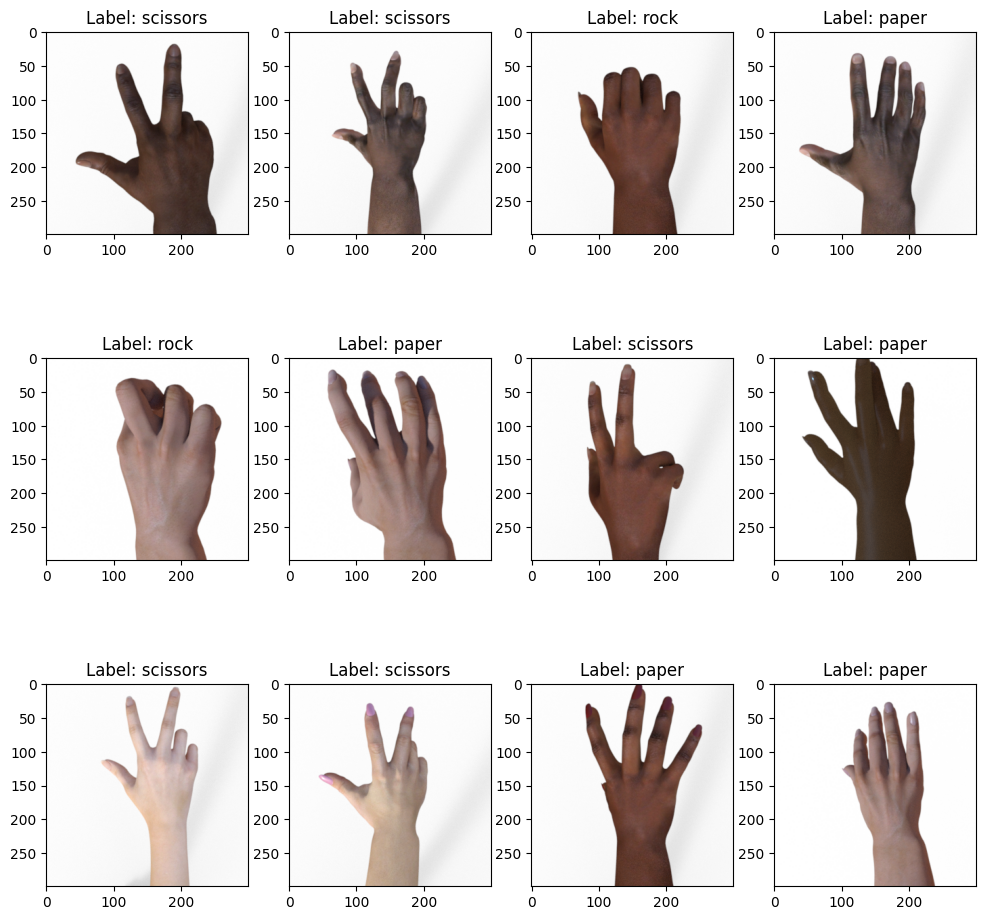

In [ ]:
from dataprocessing import preview_dataset
# Explore raw training dataset images.
preview_dataset(dataset_train_raw, get_label_name)

Now we can pre-process the images in the dataset and create train and test sets.

In [ ]:
from dataprocessing import format_example
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [ ]:
BATCH_SIZE = 32

dataset_train_shuffled = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_shuffled = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_shuffled = dataset_train_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [ ]:
print(dataset_train_shuffled)
print(dataset_test_shuffled)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


## Training VGG16

Time to implement the architecture.

In [ ]:
VGG16 = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Block 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Block 3
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Block 4
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Block 5
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    # Classification
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

In [ ]:
VGG16.build(input_shape=(None, 150, 150, 3))

In [ ]:
VGG16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

The model has a significantly larger number of parameters compared to any other convolutional neural network we have trained before. Let's proceed to train the model and evaluate its performance on the validation set.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.009)

In [ ]:
VGG16.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=VGG16.fit(dataset_train_shuffled, epochs=50, validation_data=dataset_test_shuffled)

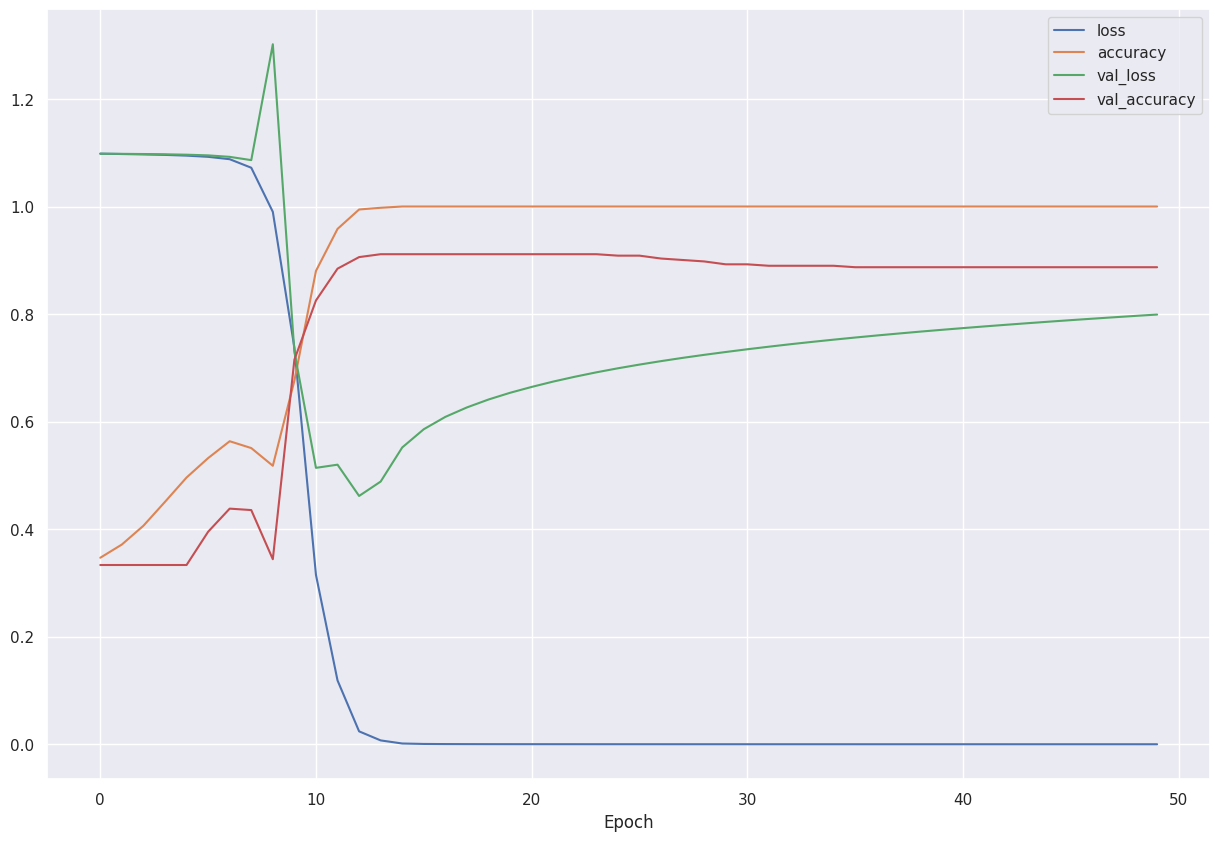

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

We did not observe any significant improvement in the results on the validation set. The model's performance is comparable to that of AlexNet and NiN. Now, let's investigate if this similarity holds true when evaluating the model on the TF Flowers Dataset.

# TF Flowers Dataset

Now I will load TF Flowers Dataset and train the model on this dataset using various learning rate schedulers that we previously discussed.

In [ ]:
#https://medium.com/@nutanbhogendrasharma/tensorflow-image-classification-with-tf-flowers-dataset-e36205deb8fc : Credit for loading dataset
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
num_classes=5

In [ ]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 1101 



In [ ]:
from dataprocessing import format_image

BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Let's visualize one of the instances from the dataset.

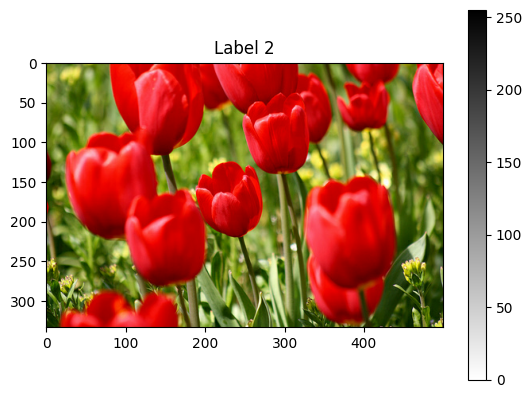

In [ ]:
for image, label in training_set.take(5):
    break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

Let's now implement the model using functional API.

In [ ]:
class VGG(tf.keras.Model):
    def __init__(self, version='VGG16', num_classes=1000):
        super(VGG, self).__init__()

        self.version=version
        # Block 1
        self.conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.conv1_2 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.pool1 = MaxPooling2D((2, 2), strides=(2, 2))

        # Block 2
        self.conv2_1 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.conv2_2 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.pool2 = MaxPooling2D((2, 2), strides=(2, 2))

        # Block 3
        self.conv3_1 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.conv3_2 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.conv3_3 = Conv2D(256, (3, 3), activation='relu', padding='same')
        if version == 'VGG19':
            self.conv3_4 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.pool3 = MaxPooling2D((2, 2), strides=(2, 2))

        # Block 4
        self.conv4_1 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv4_2 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv4_3 = Conv2D(512, (3, 3), activation='relu', padding='same')
        if version == 'VGG19':
            self.conv4_4 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.pool4 = MaxPooling2D((2, 2), strides=(2, 2))

        # Block 5
        self.conv5_1 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv5_2 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv5_3 = Conv2D(512, (3, 3), activation='relu', padding='same')
        if version == 'VGG19':
            self.conv5_4 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.pool5 = MaxPooling2D((2, 2), strides=(2, 2))

        # Classification layers
        self.flatten = Flatten()
        self.fc1 = Dense(4096, activation='relu')
        self.fc2 = Dense(4096, activation='relu')
        self.fc3 = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv1_1(inputs)
        x = self.conv1_2(x)
        x = self.pool1(x)

        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.pool2(x)

        x = self.conv3_1(x)
        x = self.conv3_2(x)
        x = self.conv3_3(x)
        if self.version == 'VGG19':  # VGG19
            x = self.conv3_4(x)
        x = self.pool3(x)

        x = self.conv4_1(x)
        x = self.conv4_2(x)
        x = self.conv4_3(x)
        if self.version == 'VGG19':  # VGG19
            x = self.conv4_4(x)
        x = self.pool4(x)

        x = self.conv5_1(x)
        x = self.conv5_2(x)
        x = self.conv5_3(x)
        if self.version == 'VGG19':  # VGG19
            x = self.conv5_4(x)
        x = self.pool5(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

The provided code allows for the usage of both VGG16 and VGG19 versions. The model can be customized by specifying the desired VGG version and the number of output classes. For TF Flowers Dataset, I will be using VGG16 and you may want to train VGG19 on the dataset to see if using additional convolutional layers improve the result.

In [ ]:
model=VGG(version='VGG16',num_classes=5)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(train_batches, epochs=50, validation_data=validation_batches)

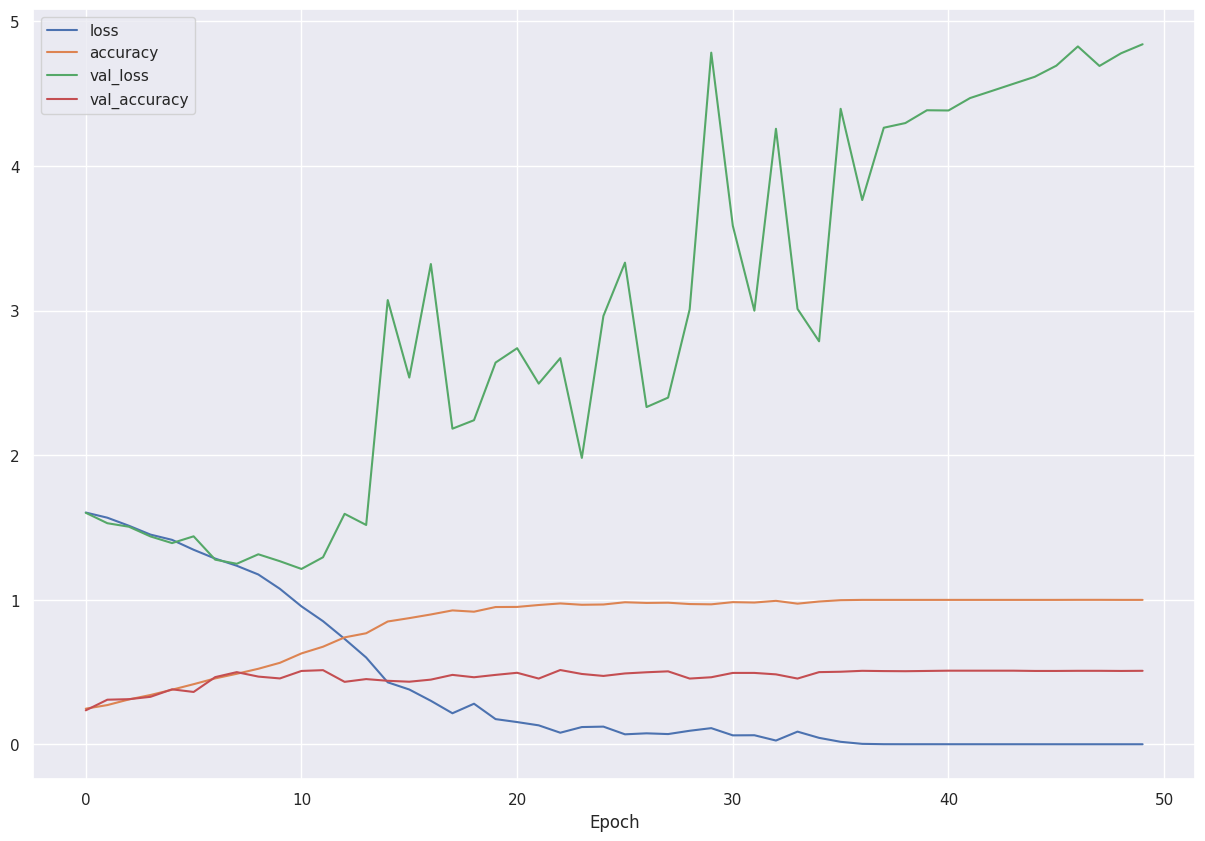

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In the baseline model, we observed poorer performance compared to both AlexNet and NiN, which can be attributed to overfitting. Let's determine whether this issue persists when employing the learning rate scheduler.

In [ ]:
from Scheduler import WarmUpCallbackEpoch

In [ ]:
model1 = VGG(version='VGG16',num_classes=5)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
lr_scheduler = WarmUpCallbackEpoch(num_epochs=50, warmup_epochs=3)
model1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model1.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[lr_scheduler.warm_up_with_cosine_epoch()])

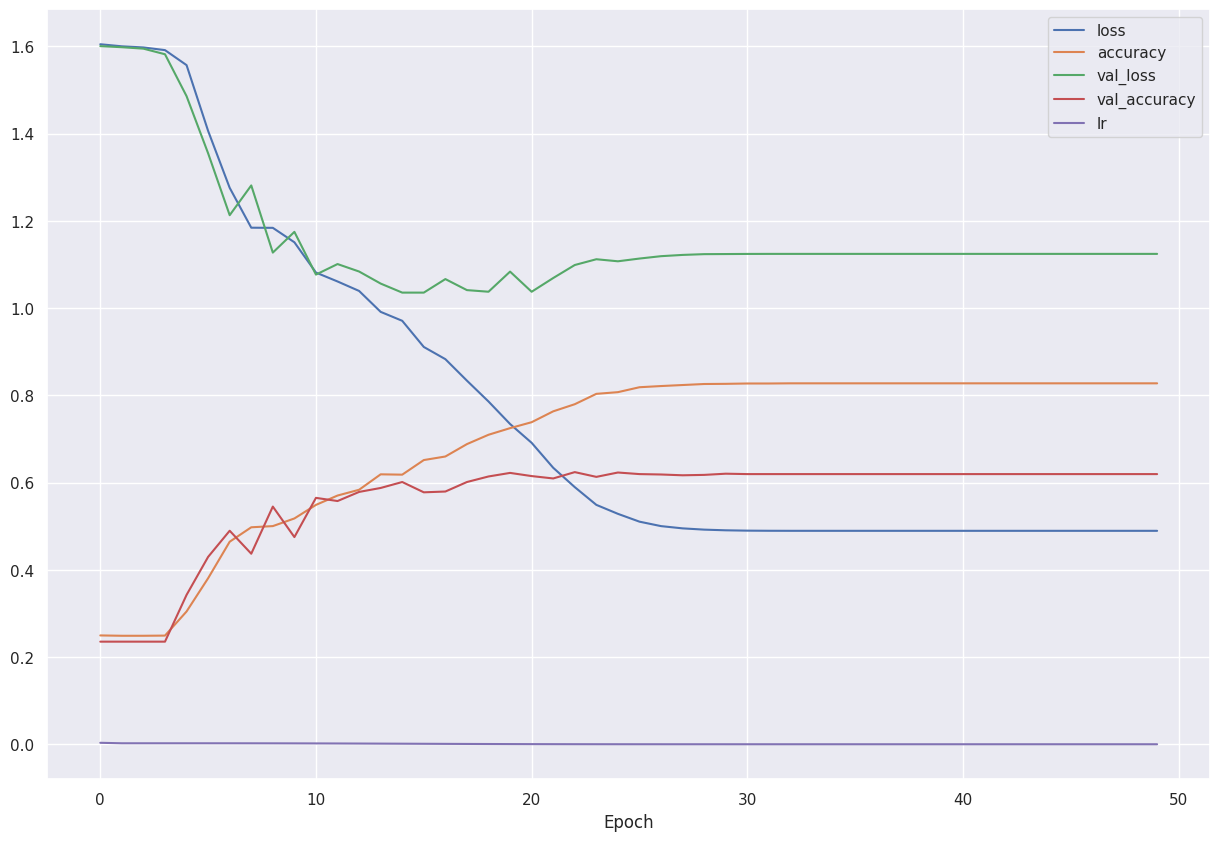

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [ ]:
from Scheduler import WarmUpCallbackBatch

In [ ]:
model2 = VGG(version='VGG16',num_classes=5)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
warmup_callback = WarmUpCallbackBatch(warmup_steps=250, initial_lr=0.01, num_epochs=30)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model2.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

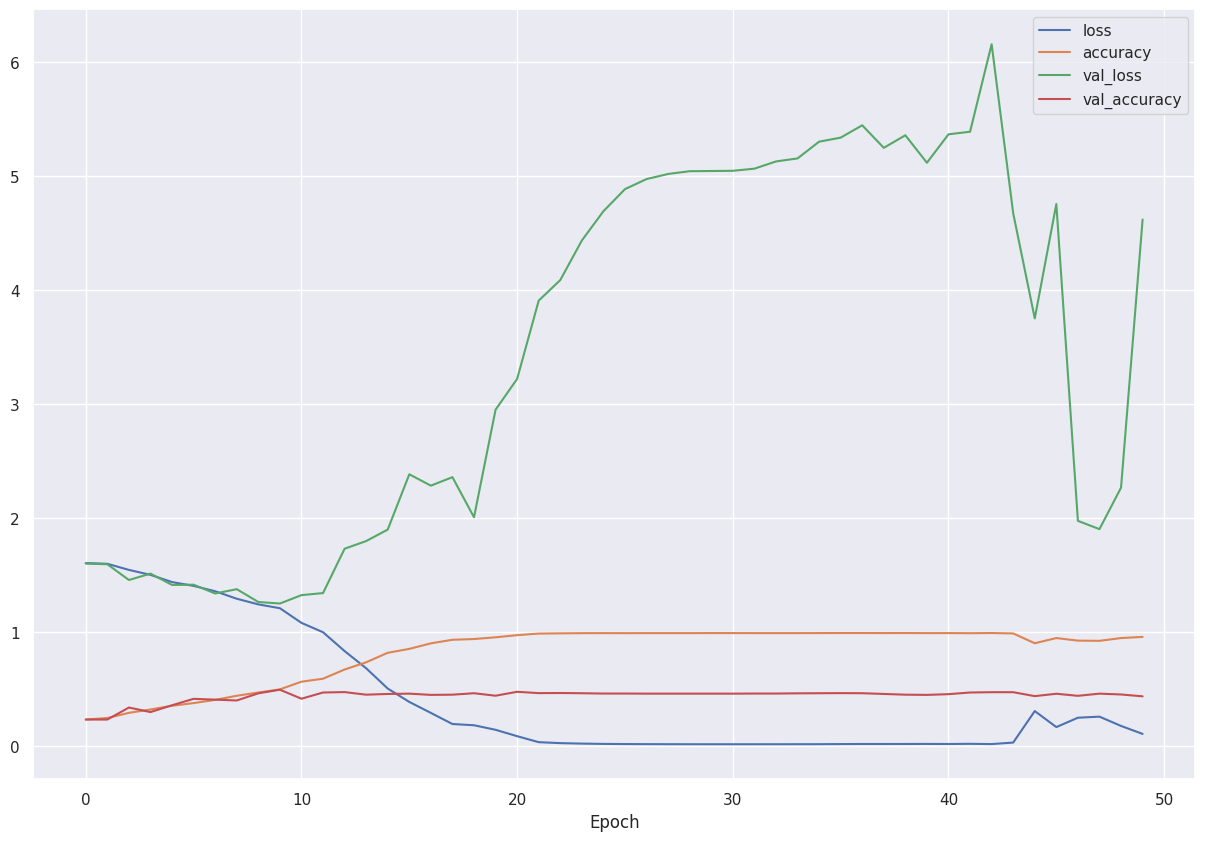

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [ ]:
from Scheduler import WarmUpCosineDecayRestarts

In [ ]:
model3=VGG(version='VGG16',num_classes=5)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)
warmup_callback = WarmUpCosineDecayRestarts(num_epochs=30,warmup_steps=40, cycle_length=250)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

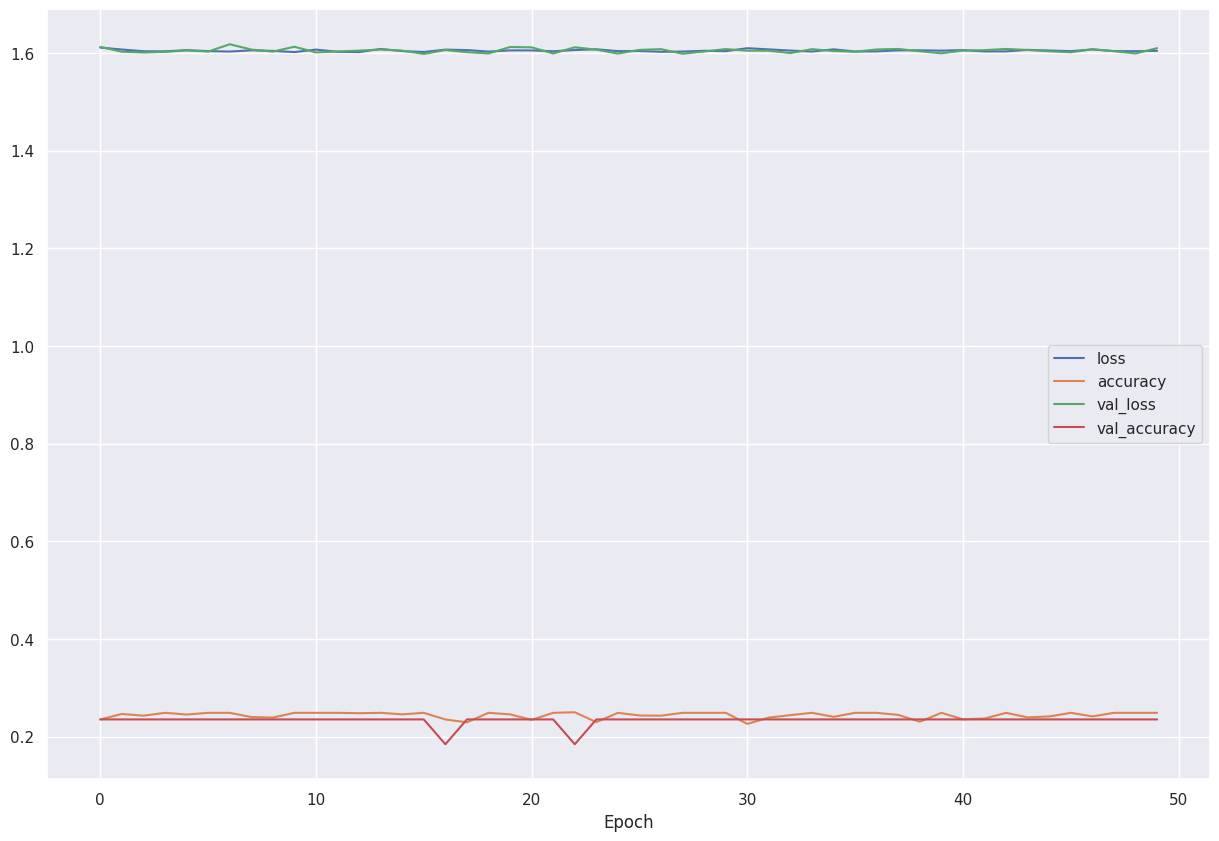

In [ ]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

The model consistently overfits, regardless of the learning rate scheduler used. Given the large number of parameters in VGG16, overfitting is expected. To address this, one can improve results by pruning the model and tuning the hyperparameters. For instance, simply tuning the number of warmup epochs/steps may improve the results.

## Additional Sources

1. [VGG Very Deep Convolutional Networks (VGGNet) – What you need to know](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)
2. [VGGNet Architecture Explained](https://medium.com/analytics-vidhya/vggnet-architecture-explained-e5c7318aa5b6)
3. [Understanding VGG16: Concepts, Architecture, and Performance](https://datagen.tech/guides/computer-vision/vgg16/)
4. [8.2. Networks Using Blocks (VGG)](https://d2l.ai/chapter_convolutional-modern/vgg.html)
5. [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)
6. [Chapter 12 Convolutional Neural Networks](https://srdas.github.io/DLBook/ConvNets.html)
7. [Introduction to VGG16 | What is VGG16?](https://www.mygreatlearning.com/blog/introduction-to-vgg16/)
8. [VGGNet-16 Architecture: A Complete Guide](https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide)
9. [Build VGG Net from Scratch with Python!](https://www.analyticsvidhya.com/blog/2021/06/build-vgg-net-from-scratch-with-python/)

## General References

The references below are the main sources I used for preparing the notebooks in this repository.

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".